In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Linear Regression

***function for drawing Latex formula***

In [2]:
def latex_poly(inter, coefs):
    f = '${:.2f}'.format(round(inter, 2))
    n = len(coefs)
    for i in range(1, n):
        if round(coefs[i], 2) < 0.00:
            f += '- {:.2f} \times x_i^{}'.format((-1) * round(coefs[i], 2), i)
        else:
            f += '+ {:.2f} \times x_i^{} '.format(round(coefs[i], 2), i)
        if i == n - 1:
            f += '$'
    return f

### Data Generation<br>Data Preprocessing(with degree=1,2,3,4)<br>Model Construction<br>Result

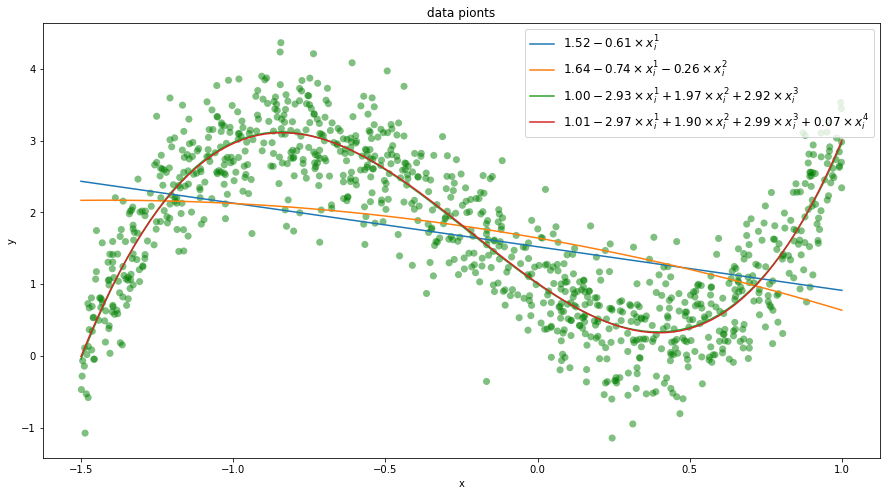

In [3]:
np.random.seed(20)
samples = np.random.uniform(-1.5, 1, 1000)

y_train = []
for s in samples:
    y_train.append((3*s**3 + 2*s**2 - 3*s + 1 + np.random.normal(0, 0.5)))

x_train = samples[:, np.newaxis]

plt.figure(figsize=(15,8))
for i in range(1, 5):
    poly = PolynomialFeatures(i)
    poly_x_train = poly.fit_transform(x_train)
    
    model = LinearRegression()
    model.fit(poly_x_train, y_train)
    
    x = np.linspace(-1.5, 1, 100)
    pred_y = model.predict(poly.transform(x[:, np.newaxis])) # do prediction with data spread accross -1.5 < x < 1 
    
    plt.plot(x, pred_y, label = repr(latex_poly(model.intercept_, model.coef_)).strip('\''))
    
    
plt.legend(loc='best', prop={'size': 12})

plt.scatter(samples, y_train, s=50, c='g', alpha=0.5, edgecolors='none')
plt.title("data pionts")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Logistic Regression

### Data Generation

In [4]:
y_train = np.random.randint(2, size=1000)
x_train = []
for p in y_train:
    mean = [p, p]
    cov = [[0.1, 0], [0, 0.1]]
    x_train.append(np.random.multivariate_normal(mean, cov, 1)[0])
x_train = np.array(x_train)

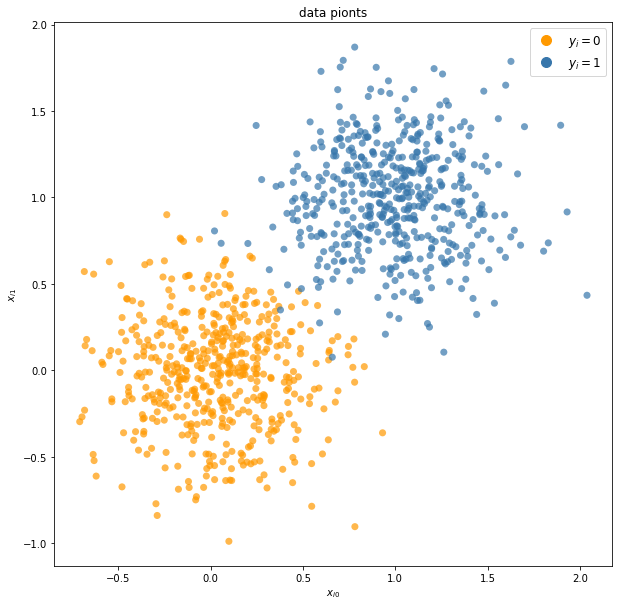

In [5]:
plt.figure(figsize=(10,10))
colormap = np.array(['#ff9900', '#3776ab'])
plt.scatter(x_train[:, 0], x_train[:, 1], s=50, c=colormap[y_train], alpha=0.7, edgecolors='none')
plt.title("data pionts")
plt.xlabel(r'$x_{i0}$')
plt.ylabel(r'$x_{i1}$')

plt.plot([],[], marker="o", ms=10, ls="", color='#ff9900', label=r'$y_i = 0$')
plt.plot([],[], marker="o", ms=10, ls="", color='#3776ab', label=r'$y_i = 1$')

plt.legend(loc='best', prop={'size': 12})
plt.show()

### Model Construction<br>Draw Decision Boundry - *code referenced from sklearn doc.*

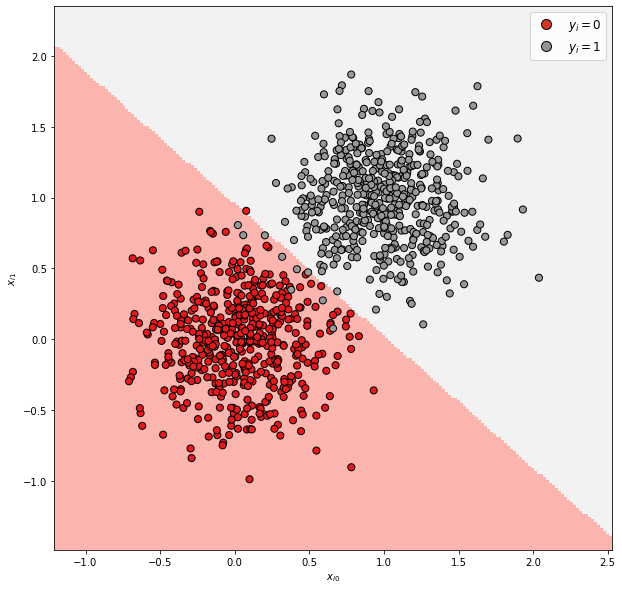

In [6]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap='Pastel1')

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], s=50, edgecolor='k', c=y_train, cmap='Set1')
plt.xlabel(r'$x_{i0}$')
plt.ylabel(r'$x_{i1}$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.plot([],[], marker="o", markeredgecolor='k', ms=10, ls="", color='#d43624', label=r'$y_i = 0$')
plt.plot([],[], marker="o", markeredgecolor='k', ms=10, ls="", color='#949392', label=r'$y_i = 1$')
plt.legend(loc='best', prop={'size': 12})

plt.show()

### Result

model accuracy: 0.99


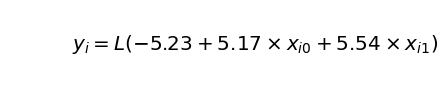

In [7]:
y_true, y_pred = y_train, clf.predict(x_train)
print('model accuracy:', accuracy_score(y_true, y_pred))
func = '$y_i = L(' + str(round(clf.intercept_[0], 2))

for idx, c in enumerate(clf.coef_[0]):
    func += (' + {:.2f} \times x_{{i{}}}'.format(round(c, 2), idx))
    
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.5, 0.5, repr(func + ')$').strip('\''), size=20)
plt.show()


